In [6]:
import seaborn as sns

In [7]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [8]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [9]:
df.shape

(891, 15)

In [10]:
# Delete the columns of missing values
df.dropna(axis=1).shape


(891, 11)

# Imputation missing values

## mean value imputation 

<Axes: xlabel='age', ylabel='Count'>

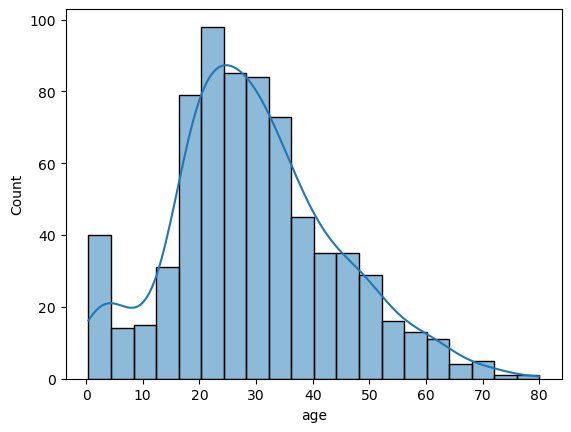

In [13]:
sns.histplot(df['age'], kde=True)

In [14]:
df['Age_mean'] = df['age'].fillna(df['age'].mean())

In [15]:
df[['Age_mean', 'age']]

,Age_mean,age
0,22.000000,22.0
1,38.000000,38.0
2,26.000000,26.0
3,35.000000,35.0
4,35.000000,35.0
...,...,...
886,27.000000,27.0
887,19.000000,19.0
888,29.699118,NaN
889,26.000000,26.0


In [16]:
# Mean imputation works well with normally distributed data

## Median value imputaion if we have outliers in the dataset 

In [18]:
df['Age_median'] = df['age'].fillna(df['age'].median())

In [19]:
df[['Age_median', 'age']]

,Age_median,age
0,22.0,22.0
1,38.0,38.0
2,26.0,26.0
3,35.0,35.0
4,35.0,35.0
...,...,...
886,27.0,27.0
887,19.0,19.0
888,28.0,NaN
889,26.0,26.0


## imputation technique for categoricla data

In [21]:
df[df['embarked'].isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,Age_mean,Age_median
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,38.0,38.0
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,62.0,62.0


In [22]:
df['embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [23]:
df[df['embarked'].notna()]['embarked']

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: embarked, Length: 889, dtype: object

In [24]:
mode_value = df[df['embarked'].notna()]['embarked'].mode()[0]
mode_value

'S'

In [25]:
df['Embarked_mode'] = df['embarked'].fillna(mode_value)

In [26]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,Age_mean,Age_median,Embarked_mode
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,22.000000,22.0,S
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,38.000000,38.0,C
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,26.000000,26.0,S
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,35.000000,35.0,S
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,35.000000,35.0,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,27.000000,27.0,S
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,19.000000,19.0,S
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,29.699118,28.0,S
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,26.000000,26.0,C


In [27]:
df[['Embarked_mode', 'embarked']]

,Embarked_mode,embarked
0,S,S
1,C,C
2,S,S
3,S,S
4,S,S
...,...,...
886,S,S
887,S,S
888,S,S
889,C,C


In [28]:
df[df['embarked'].isna()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,Age_mean,Age_median,Embarked_mode
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,38.0,38.0,S
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,62.0,62.0,S


# Video 2 Imbalanced Dataset

In [30]:
import numpy as np 
import pandas as pd 

np.random.seed(123)

n_samples = 1000

class_0_ratio = 0.9

n_class_0 = int(n_samples * class_0_ratio) 
n_class_1 = n_samples - n_class_0

In [31]:
n_class_0,n_class_1

(900, 100)

In [32]:
# Creat my dataframe with imblanced data
'''
loc (Mean):

Specifies the mean (center) of the normal distribution.
Example: loc=0 means the distribution is centered around 0.

scale (Standard Deviation):

Specifies the spread or standard deviation of the distribution.
A larger value of scale results in a wider spread of numbers.
Example: scale=1 means the standard deviation is 1.

size (Shape of Output):

Specifies the number of random numbers to generate.
Example: size=100 will generate an array of 100 random numbers.
Can be a tuple for multi-dimensional arrays. For example, size=(3, 4) generates a 3x4 array.'''

class_0 = pd.DataFrame({
    'feature_1' : np.random.normal(loc =0, scale =1, size =n_class_0),
    'feature_2' : np.random.normal(loc =0, scale =1, size = n_class_0 ),
    'target' : [0] * n_class_0
})

class_1 = pd.DataFrame({
    'feature_1' : np.random.normal(loc = 0, scale = 1, size = n_class_1),
    'feature_2' : np.random.normal(loc = 0, scale = 1, size = n_class_1),
    'target' : [1] * n_class_1
})

In [33]:
df = pd.concat([class_0, class_1]).reset_index(drop=True)

In [34]:
df.tail()

,feature_1,feature_2,target
995,-0.623629,0.845701,1
996,0.239810,-1.119923,1
997,-0.868240,-0.359297,1
998,0.902006,-1.609695,1
999,0.697490,0.013570,1


In [35]:
df['target'].value_counts()

target
0    900
1    100
Name: count, dtype: int64

## Upsampling

In [37]:
df_minority = df[df['target'] == 1]
df_majority = df[df['target'] == 0]

In [38]:
from sklearn.utils import resample
df_minority_upsampled = resample(df_minority, replace=True, n_samples=len(df_majority), random_state=42)

In [39]:
df_minority_upsampled.shape

(900, 3)

In [40]:
df_minority_upsampled.head()

,feature_1,feature_2,target
951,-0.874146,-0.156083,1
992,0.196570,-0.602575,1
914,-0.067830,0.998053,1
971,0.272825,1.034197,1
960,0.870056,-0.449515,1


In [41]:
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

In [42]:
df_upsampled.shape

(1800, 3)

## Down Sampling

In [44]:
import pandas as pd

np.random.seed(123)

n_samples = 1000
class_0_ration = 0.9
n_class_0 = int(n_samples *  class_0_ratio)
n_class_1 = n_samples - n_class_0

class_0 = pd.DataFrame({
    'feature_1' : np.random.normal(loc = 0, scale = 1 ,size = n_class_0),
    'feature_2' : np.random.normal(loc = 0 , scale = 1, size = n_class_0),
    'target' : [0] * n_class_0
})

class_1 = pd.DataFrame({
    'feature_1' : np.random.normal(loc = 0, scale = 1 , size = n_class_1), 
    'feature_2' : np.random.normal(loc = 0, scale = 1, size = n_class_1), 
    'target' : [1] * n_class_1
})

df = pd.concat([class_0, class_1]).reset_index(drop=True)
print(df['target'].value_counts())
df

target
0    900
1    100
Name: count, dtype: int64


,feature_1,feature_2,target
0,-1.085631,0.551302,0
1,0.997345,0.419589,0
2,0.282978,1.815652,0
3,-1.506295,-0.252750,0
4,-0.578600,-0.292004,0
...,...,...,...
995,-0.623629,0.845701,1
996,0.239810,-1.119923,1
997,-0.868240,-0.359297,1
998,0.902006,-1.609695,1


In [45]:
# Down sampling
df_minority = df[df['target']== 1]
df_majority = df[df['target'] == 0]

In [46]:
from sklearn.utils import resample
df_majority_downsampled = resample(df_majority, replace=False, n_samples=len(df_minority), random_state=42)

In [47]:
df_majority_downsampled.shape

(100, 3)

In [48]:
df_downsampled = pd.concat([df_majority_downsampled, df_minority])

In [49]:
df_downsampled
df_downsampled

,feature_1,feature_2,target
70,0.468439,1.720920,0
827,1.089165,-0.464899,0
231,0.753869,-0.969798,0
588,0.588686,-0.704720,0
39,0.283627,1.012868,0
...,...,...,...
995,-0.623629,0.845701,1
996,0.239810,-1.119923,1
997,-0.868240,-0.359297,1
998,0.902006,-1.609695,1


# Video 3 SMOTE (Synthetic Minority Oversampling Technique) 

In [51]:
from sklearn.datasets import make_classification

In [52]:
X, y = make_classification(n_samples= 1000, n_redundant=0, n_features=2, 
                    n_clusters_per_class=1, weights=[0.90], random_state=12)
# X is indepenedent feature 
# y is depenedent feature

In [53]:
X

array([[-0.76289759, -0.70680807],
       [-1.07543571, -1.0511621 ],
       [-0.61011459, -0.90980157],
       ...,
       [-1.32643852, -1.815178  ],
       [-0.83348573, -0.5146474 ],
       [-0.30287558, -0.57597532]])

In [54]:
import pandas as pd 

df1 = pd.DataFrame(X, columns=['f1', 'f2'])
df2 = pd.DataFrame(y, columns=['target']) 
final_df = pd.concat([df1, df2], axis = 1)

In [55]:
final_df.head()

,f1,f2,target
0,-0.762898,-0.706808,0
1,-1.075436,-1.051162,0
2,-0.610115,-0.909802,0
3,-2.023284,-0.428945,1
4,-0.812921,-1.316206,0


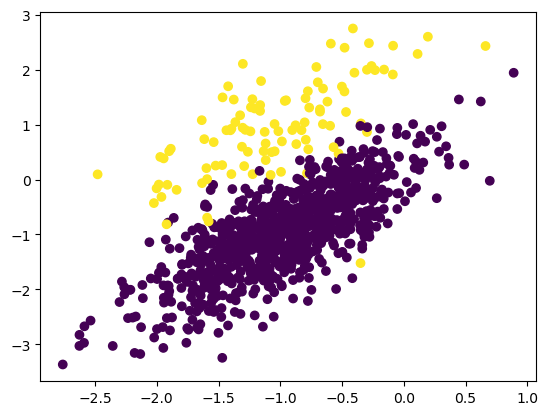

In [56]:
import matplotlib.pyplot as plt 
plt.scatter(final_df['f1'], final_df['f2'],c =final_df['target'])

In [57]:
!pip install imblearn


  Using cached imblearn-0.0-py2.py3-none-any.whl.metadata (355 bytes)
Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)


In [58]:
from imblearn.over_sampling import SMOTE

In [59]:
oversample = SMOTE()
X,y = oversample.fit_resample(final_df[['f1', 'f2']], final_df['target'])

In [60]:
X.shape

(1800, 2)

In [61]:
y.shape

(1800,)

In [62]:
len(y[y==0])

900

In [63]:
len(y[y==1])

900

In [64]:
# df1=pd.DataFrame(X,columns=['f1','f2'])
# df2=pd.DataFrame(y,columns=['target'])
# oversample_df=pd.concat([df1,df2],axis=1)
# or
oversample_df =pd.concat([X, y],axis=1) 

In [65]:
oversample_df

,f1,f2,target
0,-0.762898,-0.706808,0
1,-1.075436,-1.051162,0
2,-0.610115,-0.909802,0
3,-2.023284,-0.428945,1
4,-0.812921,-1.316206,0
...,...,...,...
1795,-1.075036,0.514962,1
1796,-1.163673,1.268612,1
1797,-1.933183,-0.172332,1
1798,-1.920013,-0.094223,1


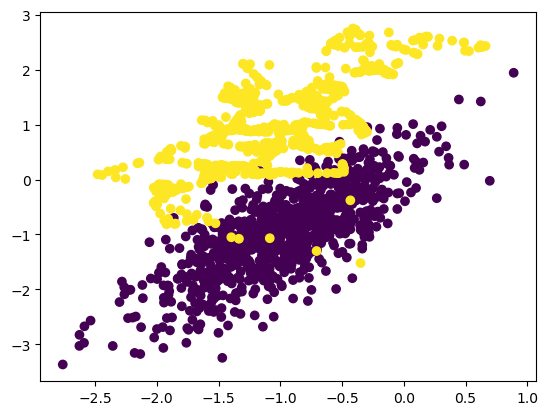

In [66]:
plt.scatter(oversample_df['f1'], oversample_df['f2'], c=oversample_df['target'])

# Video 4: Handling outliers with python

##  5 number Summary and Box plot

In [69]:
# Minimum, Maximum, Median Q1, Q3, IQR

In [70]:
import numpy as np

In [71]:
lst_marks=[45,32,56,75,89,54,32,89,90,87,67,54,45,98,99,67,74]
minimum, Q1, median, Q3, maximum=np.quantile(lst_marks, [0, 0.25, 0.50, 0.75, 1.0])

In [72]:
minimum, Q1, median, Q3, maximum

(32.0, 54.0, 67.0, 89.0, 99.0)

In [73]:
IQR = Q3 - Q1
print(IQR)

35.0


In [74]:
'''
anything lower than lower fence is and outlier
anything higher that higher fence is an outlier
'''
lower_fence = Q1 - 1.5 * (IQR)
higher_fence = Q3 + 1.5 * (IQR)

In [75]:
lower_fence

1.5

In [76]:
higher_fence

141.5

In [77]:
import seaborn as sns

<Axes: >

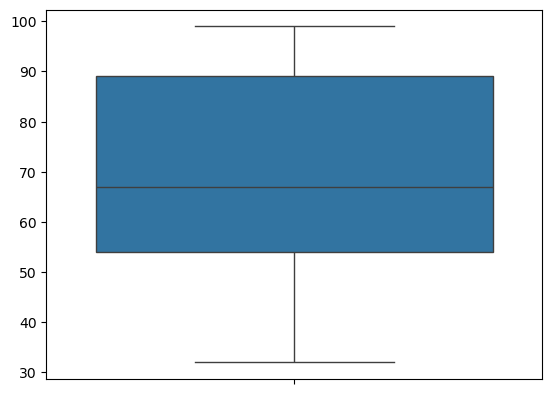

In [78]:
lst_marks=[45,32,56,75,89,54,32,89,90,87,67,54,45,98,99,67,74]
sns.boxplot(lst_marks)

<Axes: >

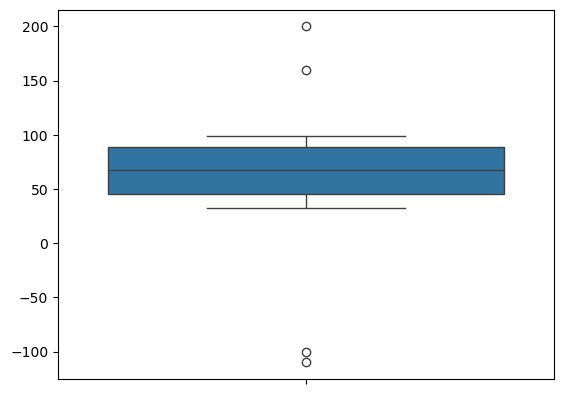

In [79]:

lst_marks=[-100, -110, 45,32,56,75,89,54,32,89,90,87,67,54,45,98,99,67,74, 200, 160]
sns.boxplot(lst_marks)

# Video 5 : Data Encoding

1. Nominal/OHE Encoding
2. Label and Ordinal Encoding
3. Target Guided Ordinal Encoding 

##  Nominal / OHE
1. Red: [1, 0, 0]
2. Green: [0, 1, 0]
3. Blue: [0, 0, 1]

In [82]:
import pandas as pd 
from sklearn.preprocessing import OneHotEncoder

In [83]:
# Create a simple dataframe

df = pd.DataFrame({
    'color' : ['red', 'blue',  'green', 'green', 'red', 'blue']
})


In [84]:
df.head()

,color
0,red
1,blue
2,green
3,green
4,red


In [85]:
encoder = OneHotEncoder()
encoded = encoder.fit_transform(df[['color']]).toarray()

In [86]:
import pandas as pd 

In [87]:
jencoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out())

encoded_df 

In [89]:
# For new data
encoder.transform([['blue']]).toarray()

/home/aromal/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


array([[1., 0., 0.]])

pd.concat([df, encoded_df], axis=1)

In [91]:
import seaborn as sns

df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [92]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
encoded = encoder.fit_transform(df[['sex','day','smoker']]).toarray()

In [93]:
encoded

array([[1., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 1., 1., 0.]])

In [94]:
import pandas as pd 
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out())

In [95]:
encoded_df

,sex_Female,sex_Male,day_Fri,day_Sat,day_Sun,day_Thur,smoker_No,smoker_Yes
0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
239,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
240,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
241,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
242,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [96]:
final_df = pd.concat([encoded_df, df], axis=1)
final_df

,sex_Female,sex_Male,day_Fri,day_Sat,day_Sun,day_Thur,smoker_No,smoker_Yes,total_bill,tip,sex,smoker,day,time,size
0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,16.99,1.01,Female,No,Sun,Dinner,2
1,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,10.34,1.66,Male,No,Sun,Dinner,3
2,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,21.01,3.50,Male,No,Sun,Dinner,3
3,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,23.68,3.31,Male,No,Sun,Dinner,2
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,29.03,5.92,Male,No,Sat,Dinner,3
240,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,27.18,2.00,Female,Yes,Sat,Dinner,2
241,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,22.67,2.00,Male,Yes,Sat,Dinner,2
242,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,17.82,1.75,Male,No,Sat,Dinner,2


In [97]:
final_df = final_df.drop(['sex', 'day', 'smoker'],axis=1)
final_df

,sex_Female,sex_Male,day_Fri,day_Sat,day_Sun,day_Thur,smoker_No,smoker_Yes,total_bill,tip,time,size
0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,16.99,1.01,Dinner,2
1,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,10.34,1.66,Dinner,3
2,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,21.01,3.50,Dinner,3
3,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,23.68,3.31,Dinner,2
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,24.59,3.61,Dinner,4
...,...,...,...,...,...,...,...,...,...,...,...,...
239,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,29.03,5.92,Dinner,3
240,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,27.18,2.00,Dinner,2
241,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,22.67,2.00,Dinner,2
242,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,17.82,1.75,Dinner,2


# Lable Encoding

In [99]:
from sklearn.preprocessing import LabelEncoder

In [100]:
df = pd.DataFrame({
    'color' : ['red', 'blue',  'green', 'green', 'red', 'blue']
})
df

,color
0,red
1,blue
2,green
3,green
4,red
5,blue


In [101]:
lbl_encoder = LabelEncoder()
lbl_encoder.fit_transform(df[['color']])

/home/aromal/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([2, 0, 1, 1, 2, 0])

In [102]:
lbl_encoder.transform([['red']])

/home/aromal/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


array([2])

In [103]:
lbl_encoder.transform([['blue']])

/home/aromal/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


array([0])

# ordinal encoding

In [105]:
from sklearn.preprocessing import OrdinalEncoder

In [106]:
df = pd.DataFrame({
    'size' : ['small', 'mediam', 'large', 'mediam', 'small', 'large']
})

In [107]:
df

,size
0,small
1,mediam
2,large
3,mediam
4,small
5,large


In [108]:
# Create an instance of ordinal encoder and them fit_transform
encoder = OrdinalEncoder(categories=[['small', 'mediam', 'large']])
encoder.fit_transform(df[['size']])


array([[0.],
       [1.],
       [2.],
       [1.],
       [0.],
       [2.]])


## Target Guided Ordinal Encoding 
It is a technique used to encode categorical variables based on their relationship with the target variable. This encoding technique is useful when we have a categorical variable with a large number of unique categories, and we want to use this variable as a feature in our machine learning model.

In Target Guided Ordinal Encoding, we replace each category in the categorical variable with a numerical value based on the mean or median of the target variable for that category. This creates a monotonic relationship between the categorical variable and the target variable, which can improve the predictive power of our model.

In [110]:
import pandas as pd 

df = pd.DataFrame({
    'city': ['New York', 'London', 'Paris', 'Tokyo', 'New York', 'Paris'],
    'price': [200, 150, 300, 250, 180, 320]
})

In [111]:
df

,city,price
0,New York,200
1,London,150
2,Paris,300
3,Tokyo,250
4,New York,180
5,Paris,320


In [112]:
mean_price = df.groupby('city')['price'].mean().to_dict()

In [113]:
mean_price

{'London': 150.0, 'New York': 190.0, 'Paris': 310.0, 'Tokyo': 250.0}

In [114]:
df['city_encoded'] = df['city'].map(mean_price)

In [115]:
df[['price', 'city_encoded']]

,price,city_encoded
0,200,190.0
1,150,150.0
2,300,310.0
3,250,250.0
4,180,190.0
5,320,310.0


In [116]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [117]:
# convert time based on total_bill
tips['time'].unique()

['Dinner', 'Lunch']
Categories (2, object): ['Lunch', 'Dinner']

In [118]:
tips[tips['time']== 'Lunch']

,total_bill,tip,sex,smoker,day,time,size
77,27.20,4.00,Male,No,Thur,Lunch,4
78,22.76,3.00,Male,No,Thur,Lunch,2
79,17.29,2.71,Male,No,Thur,Lunch,2
80,19.44,3.00,Male,Yes,Thur,Lunch,2
81,16.66,3.40,Male,No,Thur,Lunch,2
...,...,...,...,...,...,...,...
222,8.58,1.92,Male,Yes,Fri,Lunch,1
223,15.98,3.00,Female,No,Fri,Lunch,3
224,13.42,1.58,Male,Yes,Fri,Lunch,2
225,16.27,2.50,Female,Yes,Fri,Lunch,2


In [119]:
time_encoded = tips.groupby('time')['total_bill'].mean().to_dict()
time_encoded

/tmp/ipykernel_6049/1533427528.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  time_encoded = tips.groupby('time')['total_bill'].mean().to_dict()


{'Lunch': 17.168676470588235, 'Dinner': 20.79715909090909}

In [120]:
tips['time_encoded'] = tips['time'].map(time_encoded)

In [121]:
tips

,total_bill,tip,sex,smoker,day,time,size,time_encoded
0,16.99,1.01,Female,No,Sun,Dinner,2,20.797159
1,10.34,1.66,Male,No,Sun,Dinner,3,20.797159
2,21.01,3.50,Male,No,Sun,Dinner,3,20.797159
3,23.68,3.31,Male,No,Sun,Dinner,2,20.797159
4,24.59,3.61,Female,No,Sun,Dinner,4,20.797159
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,20.797159
240,27.18,2.00,Female,Yes,Sat,Dinner,2,20.797159
241,22.67,2.00,Male,Yes,Sat,Dinner,2,20.797159
242,17.82,1.75,Male,No,Sat,Dinner,2,20.797159


In [122]:
tips['time_encoded'].unique()

[20.797159, 17.168676]
Categories (2, float64): [17.168676, 20.797159]